**Age and Gender Prediction.**
<br>
In this project, we will be performing both classification and regression to predict both gender and age respectively.

In [3]:
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Data manipulation libraries
import pandas as pd
import numpy as np

# Operating system module
import os

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Progress bar module
from tqdm.notebook import tqdm

# Tensorflow and Keras modules for building and training the model
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input


**Load the dataset**

In [4]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Unzip the dataset file located in Google Drive
!unzip '/content/drive/MyDrive/Projects/AGE & GENDER/UTKFace.zip'


Streaming output truncated to the last 5000 lines.
  inflating: UTKFace/52_0_3_20170113184200775.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170113190623929.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170117190840617.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119160357804.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119181010188.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200211340.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200241996.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200259595.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119200407188.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119204331863.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119204337838.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205638160.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205639336.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205641007.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_20170119205647136.jpg.chip.jpg  
  inflating: UTKFace/52_0_3_201701

In [5]:
# Directory path where the dataset is located
BASE_DIR = "/content/UTKFace"

In [6]:
# List to store paths of images
image_paths = []

# List to store age labels
age_labels = []

# List to store gender labels
gender_labels = []


In [7]:
# Iterate over each file in the dataset directory
for filename in tqdm(os.listdir(BASE_DIR)):
    # Create the full path of the image file
    image_path = os.path.join(BASE_DIR, filename)

    # Split the filename to extract age and gender information
    temp = filename.split('_')

    # Extract age from the filename and convert it to integer
    age = int(temp[0])

    # Extract gender from the filename and convert it to integer
    gender = int(temp[1])

    # Append the image path to the list of image paths
    image_paths.append(image_path)

    # Append the age label to the list of age labels
    age_labels.append(age)

    # Append the gender label to the list of gender labels
    gender_labels.append(gender)


  0%|          | 0/23708 [00:00<?, ?it/s]

In [8]:
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)}, Number of image_paths: {len(image_paths)}')

Number of age_labels: 23708, Number of gender_labels: 23708, Number of image_paths: 23708


In [9]:
# Create a Pandas DataFrame to store image paths, age labels, and gender labels
df = pd.DataFrame()

# Assign image paths, age labels, and gender labels to DataFrame columns
df['image'] = image_paths
df['age'] = age_labels
df['gender'] = gender_labels


In [10]:
# Display the first few rows of the DataFrame to inspect its structure and contents
df.head()


image  age  gender
0  /content/UTKFace/24_1_0_20170116222814643.jpg....   24       1
1  /content/UTKFace/25_0_1_20170116205335757.jpg....   25       0
2  /content/UTKFace/4_0_4_20161221195021183.jpg.c...    4       0
3  /content/UTKFace/28_0_0_20170117134849833.jpg....   28       0
4  /content/UTKFace/35_0_1_20170113152731945.jpg....   35       0

In [11]:
# Dictionary mapping gender labels to gender names
gender_dict = {0: 'Male', 1: 'Female'}


**Exploratory Data Analysis (EDA)**

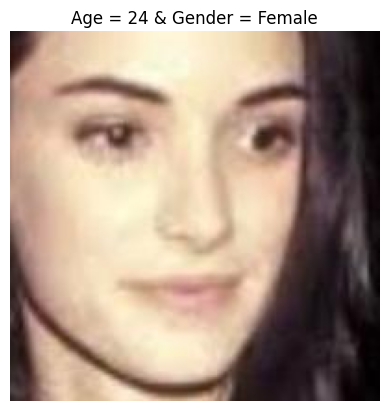

In [12]:
# Import necessary module from PIL library
from PIL import Image

# Get the age and gender labels for the first image in the DataFrame
age = df['age'][0]
gender = df['gender'][0]

# Open the first image using its path stored in the DataFrame
img = Image.open(df['image'][0])

# Set title with age and gender information
plt.title(f'Age = {age} & Gender = {gender_dict[gender]}')

# Turn off axis
plt.axis('off')

# Display the image
plt.imshow(img);


<Axes: xlabel='age', ylabel='Density'>

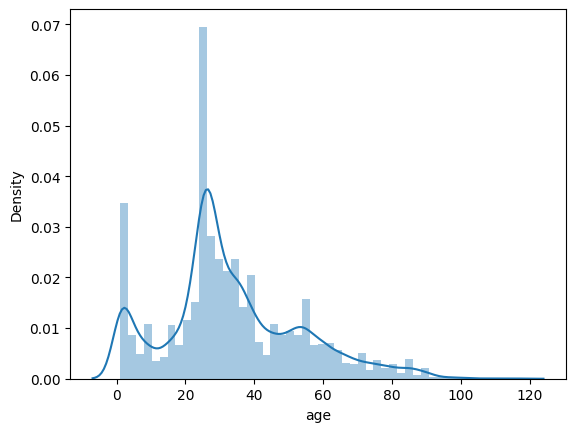

In [13]:
# Plot a distribution plot for age labels using Seaborn
sns.distplot(df['age'])


The distribution roughly follows a normal distribution that is slightly skewed to the right with a median of around 27 years. The majority are in between ages 25 to 30 years old.The range is from 0 to 120 years. There are some outliers at the higher end of the distribution.

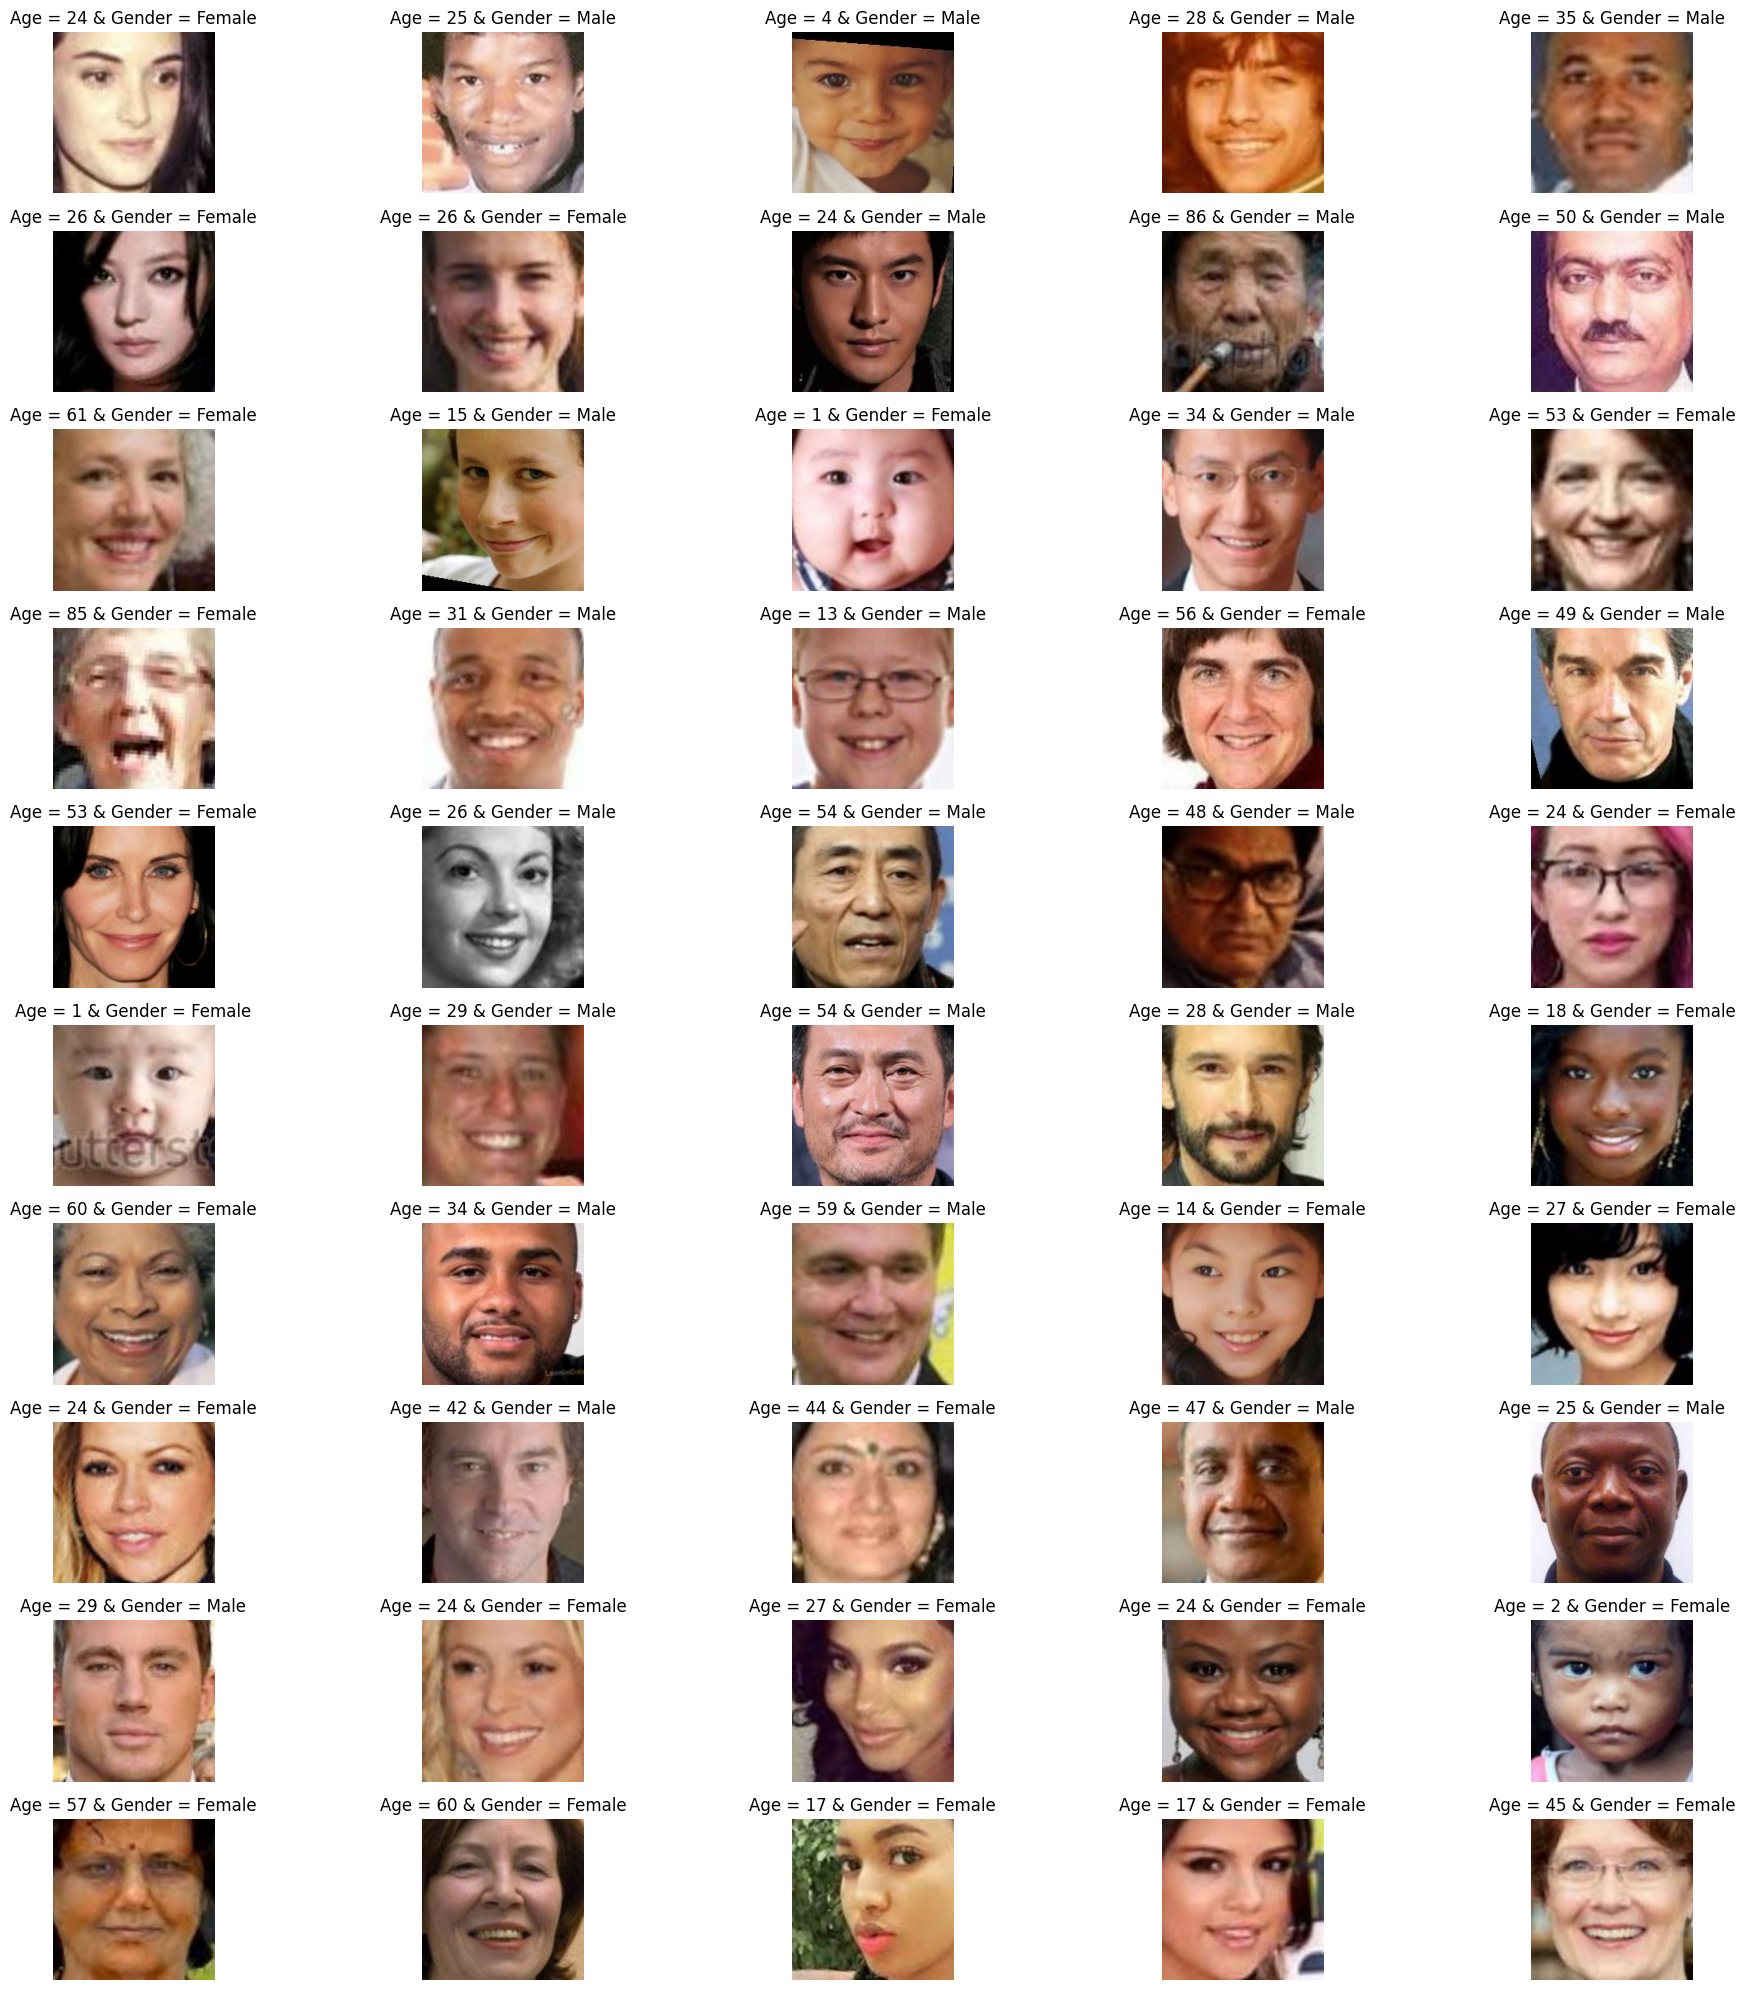

In [14]:
# Set figure size
plt.figure(figsize=(20, 20))

# Select the first 50 rows from the DataFrame
files = df.iloc[0:50]

# Iterate over the selected rows
for index, file, age, gender in files.itertuples():
    # Create subplots in a grid of 10x5
    plt.subplot(10, 5, index+1)

    # Load image
    img = load_img(file)

    # Convert image to numpy array
    img = np.array(img)

    # Display the image
    plt.imshow(img)

    # Set title with age and gender information
    plt.title(f'Age = {age} & Gender = {gender_dict[gender]}')

    # Turn off axis
    plt.axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


**FEATURE EXTRACTION**

In [15]:

# Define a function to extract features from images
def extract_features(images):
    # Initialize an empty list to store features
    features = []

    # Iterate over each image
    for image in tqdm(images):
        # Load image in grayscale mode and resize it to 128x128
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.LANCZOS)

        # Convert image to numpy array
        img = np.array(img)

        # Append the image to the features list
        features.append(img)

    # Convert the list of features to a numpy array
    features = np.array(features)

    # Reshape the features array to the required format for the model
    features = features.reshape(len(features), 128, 128, 1)

    return features


In [16]:
# Extract features from the images in the DataFrame
X = extract_features(df['image'])


  0%|          | 0/23708 [00:00<?, ?it/s]

In [17]:
# Get the shape of the array representing extracted features
X.shape


(23708, 128, 128, 1)

In [18]:
# Normalize the pixel values of the images
X = X / 255.0


In [19]:
# Convert gender labels to numpy array
y_gender = np.array(df['gender'])

# Convert age labels to numpy array
y_age = np.array(df['age'])


In [20]:
# Define the input shape for the model
input_shape = (128, 128, 1)


In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_gender_train, y_gender_test, y_age_train, y_age_test = train_test_split(X, y_gender, y_age, test_size=0.2, random_state=42)


In [22]:
# Define the input layer
inputs = Input((input_shape))

# Convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

# Flatten layer
flatten = Flatten()(maxp_4)

# Fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

# Dropout layers
dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

# Output layers for gender and age predictions
output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

# Define the model with input and output layers
model = Model(inputs=[inputs], outputs=[output_1, output_2])


In [23]:
# Compile the model with appropriate loss functions, optimizer, and metrics
model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam',
              metrics=['accuracy', 'mae'])


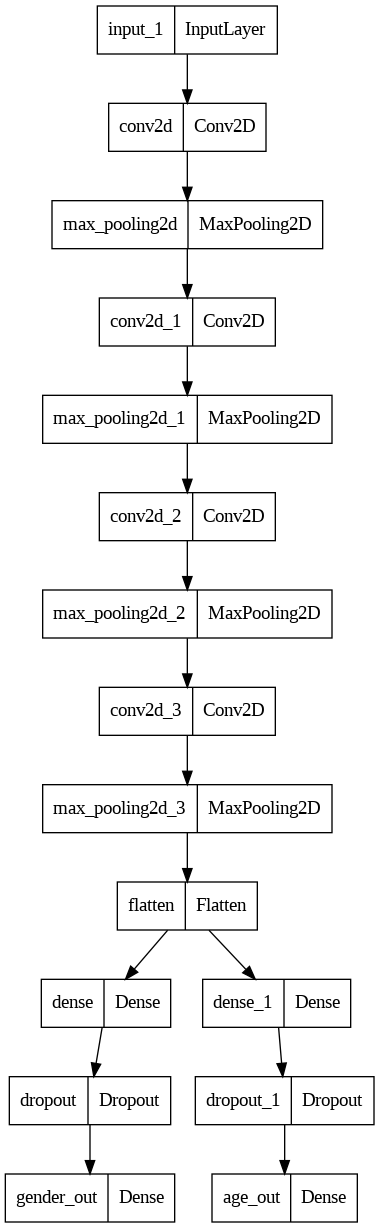

In [24]:
# Import the necessary module to plot the model
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model)


In [25]:
# Train the model with the training data, using both gender and age labels as targets
history = model.fit(x=X_train, y=[y_gender_train, y_age_train], batch_size=32, epochs=30, validation_split=0.2)


Epoch 1/30
475/475 [==============================] - 22s 27ms/step - loss: 16.5882 - gender_out_loss: 0.7081 - age_out_loss: 15.8801 - gender_out_accuracy: 0.5108 - gender_out_mae: 0.4985 - age_out_accuracy: 0.0475 - age_out_mae: 15.8801 - val_loss: 16.0832 - val_gender_out_loss: 0.6925 - val_age_out_loss: 15.3907 - val_gender_out_accuracy: 0.5374 - val_gender_out_mae: 0.4996 - val_age_out_accuracy: 0.0477 - val_age_out_mae: 15.3907
Epoch 2/30
475/475 [==============================] - 10s 22ms/step - loss: 14.6125 - gender_out_loss: 0.6225 - age_out_loss: 13.9900 - gender_out_accuracy: 0.6298 - gender_out_mae: 0.4358 - age_out_accuracy: 0.0473 - age_out_mae: 13.9900 - val_loss: 12.5151 - val_gender_out_loss: 0.4788 - val_age_out_loss: 12.0362 - val_gender_out_accuracy: 0.7746 - val_gender_out_mae: 0.3353 - val_age_out_accuracy: 0.0477 - val_age_out_mae: 12.0362
Epoch 3/30
475/475 [==============================] - 11s 24ms/step - loss: 11.4935 - gender_out_loss: 0.4650 - age_out_loss

**Plot Results**

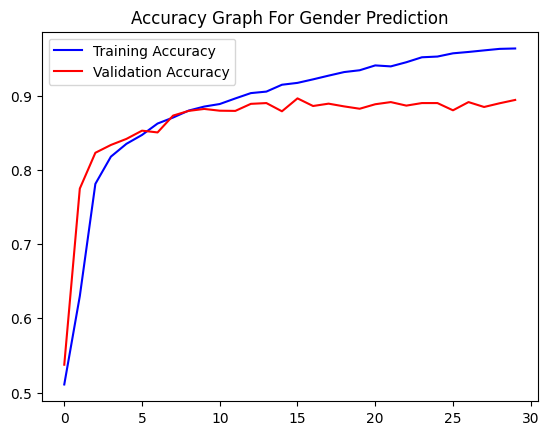

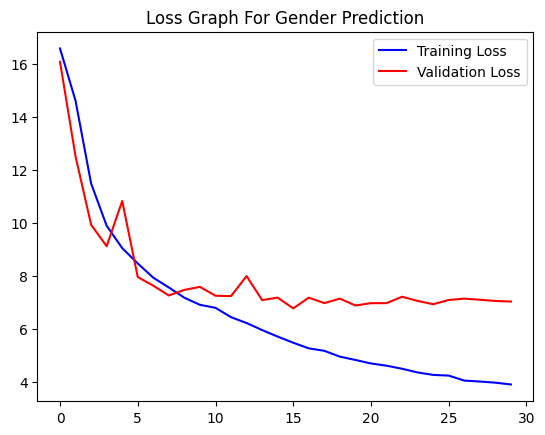

In [26]:
# Get training and validation accuracy for gender prediction
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

# Plot training and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph For Gender Prediction')
plt.legend()
plt.show()

# Get training and validation loss for gender prediction
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph For Gender Prediction')
plt.legend()
plt.show()


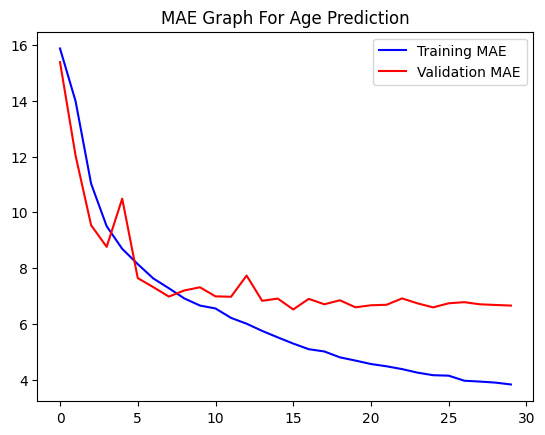

In [27]:
# Get training and validation MAE for age prediction
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

# Plot training and validation MAE for age prediction
plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('MAE Graph For Age Prediction')
plt.legend()
plt.show()


In [28]:
# Predictions on the test set
test_predictions = model.predict(X_test)

# Extracting gender predictions
gender_predictions = (test_predictions[0] > 0.5).astype(int).flatten()

# Calculating accuracy for gender prediction
from sklearn.metrics import accuracy_score
gender_accuracy = accuracy_score(y_gender_test, gender_predictions)

print("Gender Prediction Accuracy on Testing Set:", gender_accuracy*100,"%")

# Extracting age predictions
age_predictions = test_predictions[1].flatten()

# Calculating mean absolute error (MAE) for age prediction
from sklearn.metrics import mean_absolute_error
age_mae = mean_absolute_error(y_age_test, age_predictions)

print("Age Prediction MAE on Testing Set:", age_mae)


149/149 [==============================] - 1s 7ms/step
Gender Prediction Accuracy on Testing Set: 89.56136651202024 %
Age Prediction MAE on Testing Set: 6.748970196750887


Original Gender: Male Original Age: 40
1/1 [==============================] - 0s 188ms/step
Predicted Gender: Male Predicted Age: 37


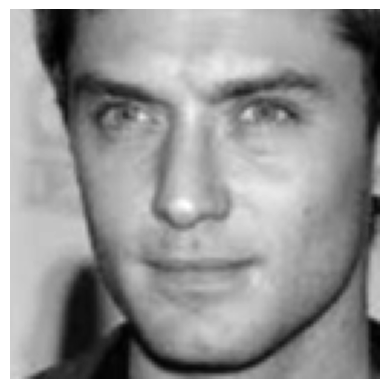

In [29]:
# Index of the image to be evaluated
image_index = 100

# Print original gender and age labels
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Predict gender and age labels using the model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

# Print predicted gender and age labels
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

# Display the image
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');


Original Gender: Female Original Age: 21
1/1 [==============================] - 0s 21ms/step
Predicted Gender: Female Predicted Age: 28


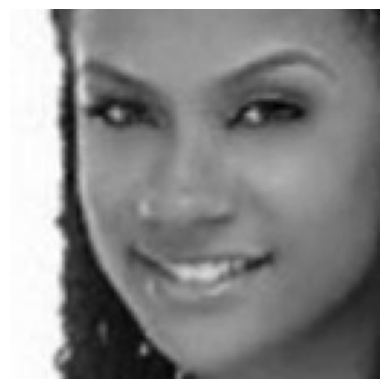

In [30]:
# Index of the image to be evaluated
image_index = 3000

# Print original gender and age labels
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Predict gender and age labels using the model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

# Print predicted gender and age labels
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

# Display the image
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');


Original Gender: Female Original Age: 12
1/1 [==============================] - 0s 18ms/step
Predicted Gender: Female Predicted Age: 10


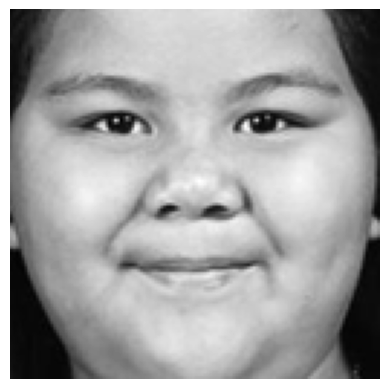

In [31]:
# Index of the image to be evaluated
image_index = 10000

# Print original gender and age labels
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Predict gender and age labels using the model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

# Print predicted gender and age labels
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

# Display the image
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');


Original Gender: Male Original Age: 32
1/1 [==============================] - 0s 24ms/step
Predicted Gender: Male Predicted Age: 31


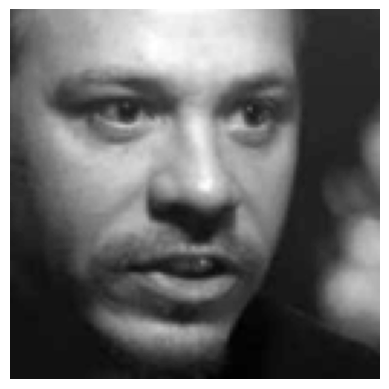

In [32]:
# Index of the image to be evaluated
image_index = 5000

# Print original gender and age labels
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Predict gender and age labels using the model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

# Print predicted gender and age labels
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

# Display the image
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');


Original Gender: Female Original Age: 36
1/1 [==============================] - 0s 26ms/step
Predicted Gender: Female Predicted Age: 38


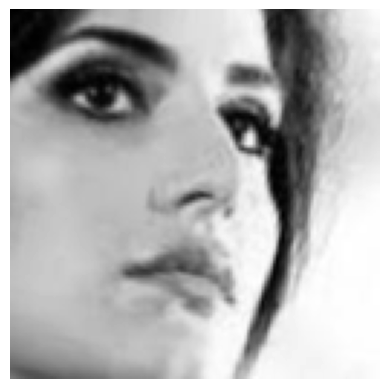

In [33]:
# Index of the image to be evaluated
image_index = 2000

# Print original gender and age labels
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Predict gender and age labels using the model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

# Print predicted gender and age labels
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

# Display the image
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');


Original Gender: Male Original Age: 2
1/1 [==============================] - 0s 42ms/step
Predicted Gender: Male Predicted Age: 3


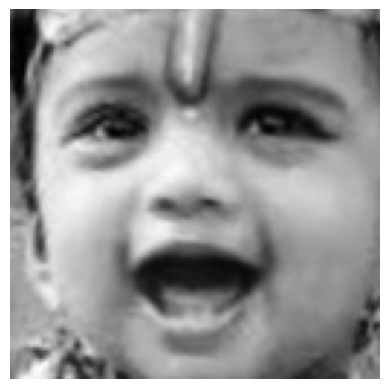

In [37]:
# Index of the image to be evaluated
image_index = 2300

# Print original gender and age labels
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Predict gender and age labels using the model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

# Print predicted gender and age labels
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

# Display the image
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 8
1/1 [==============================] - 0s 20ms/step
Predicted Gender: Female Predicted Age: 9


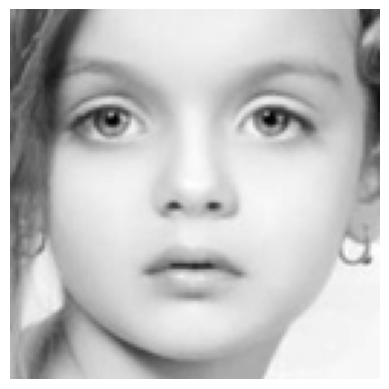

In [35]:
# Index of the image to be evaluated
image_index = 2900

# Print original gender and age labels
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Predict gender and age labels using the model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

# Print predicted gender and age labels
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

# Display the image
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');


Original Gender: Male Original Age: 21
1/1 [==============================] - 0s 19ms/step
Predicted Gender: Male Predicted Age: 24


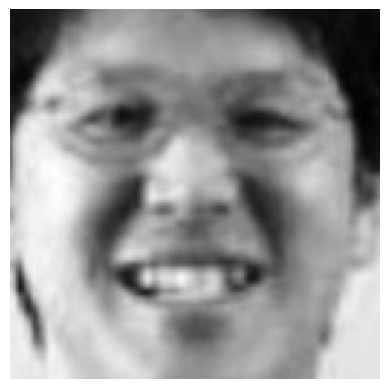

In [36]:
# Index of the image to be evaluated
image_index = 2709

# Print original gender and age labels
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Predict gender and age labels using the model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

# Print predicted gender and age labels
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

# Display the image
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');
